In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("samsung_global_sales_dataset.csv")
df.head(4)

,sale_id,sale_date,year,quarter,month,country,region,city,product_name,category,...,currency,fx_rate_to_usd,revenue_local_currency,sales_channel,payment_method,customer_segment,customer_age_group,previous_device_os,customer_rating,return_status
0,SAMS-00000001,01-01-2021,2021,Q1,January,Argentina,South America,Buenos Aires,Samsung Galaxy Tab S9 Ultra,Galaxy Tab,...,ARS,907.0,1130820.39,E-commerce Platform,Samsung Pay,Business,45–54,NaN,3.2,Kept
1,SAMS-00000002,23-03-2021,2021,Q1,March,Argentina,South America,Buenos Aires,Samsung Galaxy S23,Galaxy S,...,ARS,907.0,1322152.04,Authorized Reseller,Net Banking,Government,55+,Feature Phone,NaN,Kept
2,SAMS-00000003,22-05-2021,2021,Q2,May,Argentina,South America,Buenos Aires,Samsung Galaxy A34 5G,Galaxy A,...,ARS,907.0,1964398.74,Corporate / B2B,Gift Card,Individual,25–34,New User,3.5,Kept
3,SAMS-00000004,26-07-2021,2021,Q3,July,Argentina,South America,Buenos Aires,Samsung T55 27-inch FHD,Monitor,...,ARS,907.0,660359.49,Third-Party Retailer,BNPL (Buy Now Pay Later),Enterprise,55+,NaN,4.0,Kept


In [12]:
df.shape

(15500, 28)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sale_id                 15500 non-null  object 
 1   sale_date               15500 non-null  object 
 2   year                    15500 non-null  int64  
 3   quarter                 15500 non-null  object 
 4   month                   15500 non-null  object 
 5   country                 15500 non-null  object 
 6   region                  15500 non-null  object 
 7   city                    15500 non-null  object 
 8   product_name            15500 non-null  object 
 9   category                15500 non-null  object 
 10  storage                 7651 non-null   object 
 11  color                   15500 non-null  object 
 12  is_5g                   15500 non-null  object 
 13  unit_price_usd          15500 non-null  float64
 14  discount_pct            15500 non-null

In [14]:
backup = df.copy()

## Data Cleaning ##

In [15]:
df.isnull().sum()

sale_id                      0
sale_date                    0
year                         0
quarter                      0
month                        0
country                      0
region                       0
city                         0
product_name                 0
category                     0
storage                   7849
color                        0
is_5g                        0
unit_price_usd               0
discount_pct                 0
units_sold                   0
discounted_price_usd         0
revenue_usd                  0
currency                     0
fx_rate_to_usd               0
revenue_local_currency       0
sales_channel                0
payment_method               0
customer_segment             0
customer_age_group           0
previous_device_os        9373
customer_rating           4251
return_status                0
dtype: int64

In [16]:
df['sale_date'] = pd.to_datetime(df['sale_date'], format='%d-%m-%Y')

In [17]:
df['customer_rating'] = df['customer_rating'].fillna(df['customer_rating'].mean())
df['storage'] = df['storage'].fillna("Unknown")
df['previous_device_os'] = df['previous_device_os'].fillna("Unknown")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   sale_id                 15500 non-null  object        
 1   sale_date               15500 non-null  datetime64[ns]
 2   year                    15500 non-null  int64         
 3   quarter                 15500 non-null  object        
 4   month                   15500 non-null  object        
 5   country                 15500 non-null  object        
 6   region                  15500 non-null  object        
 7   city                    15500 non-null  object        
 8   product_name            15500 non-null  object        
 9   category                15500 non-null  object        
 10  storage                 15500 non-null  object        
 11  color                   15500 non-null  object        
 12  is_5g                   15500 non-null  object

## Cleaned Dataset ##

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   sale_id                 15500 non-null  object        
 1   sale_date               15500 non-null  datetime64[ns]
 2   year                    15500 non-null  int64         
 3   quarter                 15500 non-null  object        
 4   month                   15500 non-null  object        
 5   country                 15500 non-null  object        
 6   region                  15500 non-null  object        
 7   city                    15500 non-null  object        
 8   product_name            15500 non-null  object        
 9   category                15500 non-null  object        
 10  storage                 15500 non-null  object        
 11  color                   15500 non-null  object        
 12  is_5g                   15500 non-null  object

In [20]:
df.head()

,sale_id,sale_date,year,quarter,month,country,region,city,product_name,category,...,currency,fx_rate_to_usd,revenue_local_currency,sales_channel,payment_method,customer_segment,customer_age_group,previous_device_os,customer_rating,return_status
0,SAMS-00000001,2021-01-01,2021,Q1,January,Argentina,South America,Buenos Aires,Samsung Galaxy Tab S9 Ultra,Galaxy Tab,...,ARS,907.0,1130820.39,E-commerce Platform,Samsung Pay,Business,45–54,Unknown,3.200000,Kept
1,SAMS-00000002,2021-03-23,2021,Q1,March,Argentina,South America,Buenos Aires,Samsung Galaxy S23,Galaxy S,...,ARS,907.0,1322152.04,Authorized Reseller,Net Banking,Government,55+,Feature Phone,3.743515,Kept
2,SAMS-00000003,2021-05-22,2021,Q2,May,Argentina,South America,Buenos Aires,Samsung Galaxy A34 5G,Galaxy A,...,ARS,907.0,1964398.74,Corporate / B2B,Gift Card,Individual,25–34,New User,3.500000,Kept
3,SAMS-00000004,2021-07-26,2021,Q3,July,Argentina,South America,Buenos Aires,Samsung T55 27-inch FHD,Monitor,...,ARS,907.0,660359.49,Third-Party Retailer,BNPL (Buy Now Pay Later),Enterprise,55+,Unknown,4.000000,Kept
4,SAMS-00000005,2021-09-02,2021,Q3,September,Argentina,South America,Buenos Aires,Samsung Galaxy Z Fold 4,Galaxy Z,...,ARS,907.0,2835245.72,Authorized Reseller,Gift Card,Business,55+,Android (Other),3.000000,Kept


In [21]:
df.describe()

,sale_date,year,unit_price_usd,discount_pct,units_sold,discounted_price_usd,revenue_usd,fx_rate_to_usd,revenue_local_currency,customer_rating
count,15500,15500.000000,15500.000000,15500.000000,15500.000000,15500.000000,15500.000000,15500.000000,1.550000e+04,15500.000000
mean,2023-01-04 11:56:33.754838784,2022.511935,665.116825,5.708452,2.360000,627.134001,1478.145734,1054.528710,1.595853e+06,3.743515
min,2021-01-01 00:00:00,2021.000000,8.200000,0.000000,1.000000,6.600000,6.610000,0.790000,6.080000e+00,2.500000
25%,2022-01-12 00:00:00,2022.000000,185.435000,0.000000,1.000000,172.780000,254.265000,1.360000,1.199072e+03,3.400000
50%,2023-01-04 00:00:00,2023.000000,421.490000,3.000000,2.000000,397.410000,739.380000,10.650000,7.813940e+03,3.743515
75%,2024-01-05 00:00:00,2024.000000,938.657500,10.000000,3.000000,882.907500,1695.315000,110.000000,9.126992e+04,4.100000
max,2024-12-31 00:00:00,2024.000000,5442.700000,20.000000,10.000000,5442.700000,47665.900000,24500.000000,3.647727e+08,5.000000
std,NaN,1.113496,736.014360,6.406814,1.897958,695.723305,2368.688098,4062.232887,1.092157e+07,0.614435


## Univariate Analysis ##

#### Revenue Distribution ####

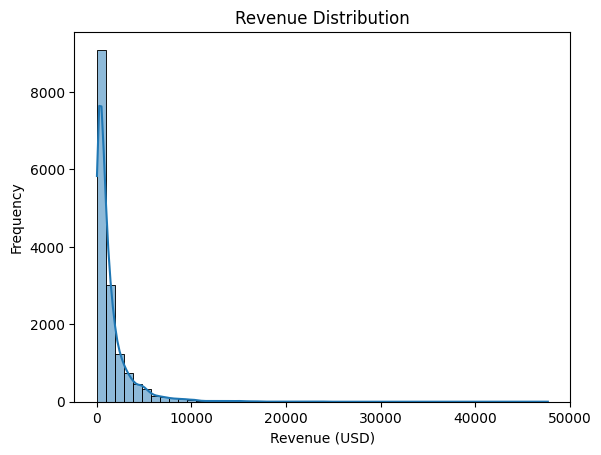

In [22]:
sns.histplot(df['revenue_usd'], bins=50, kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Revenue (USD)")
plt.ylabel("Frequency")
plt.show()

### Unit Sold Distribution ###

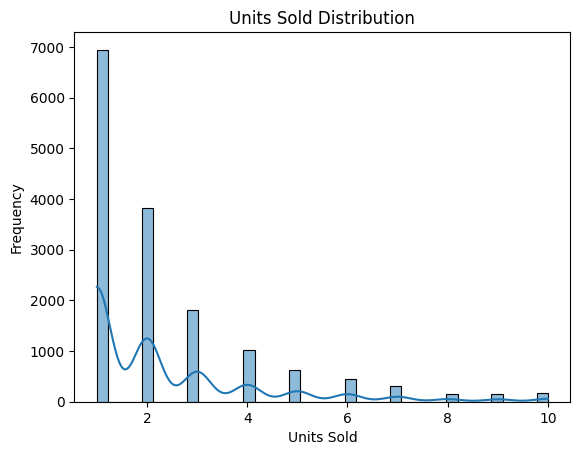

In [23]:
sns.histplot(df['units_sold'], bins=40, kde=True)
plt.title("Units Sold Distribution")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.show()

### Category Count ###

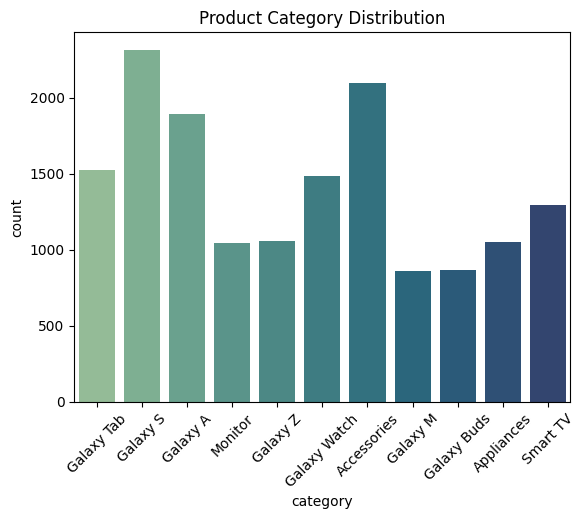

In [24]:
sns.countplot(x='category', data=df, hue='category', palette='crest')
plt.title("Product Category Distribution")
plt.xticks(rotation=45)
plt.show()

### Sales Channel Distribution ###

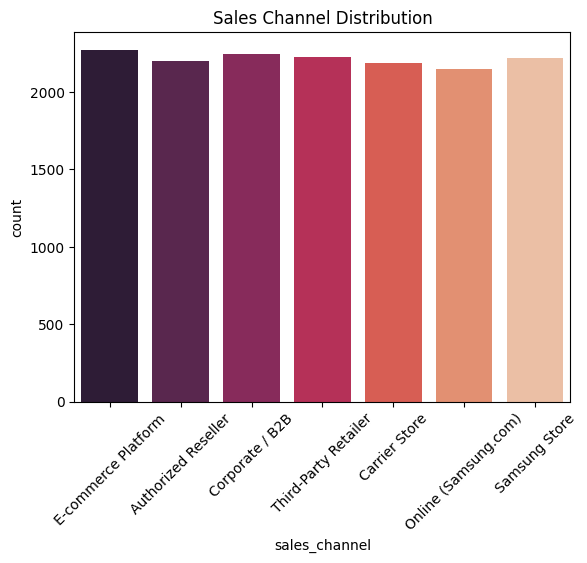

In [25]:
sns.countplot(x='sales_channel', data=df, hue='sales_channel', palette="rocket")
plt.title("Sales Channel Distribution")
plt.xticks(rotation=45)
plt.show()

### Return Status

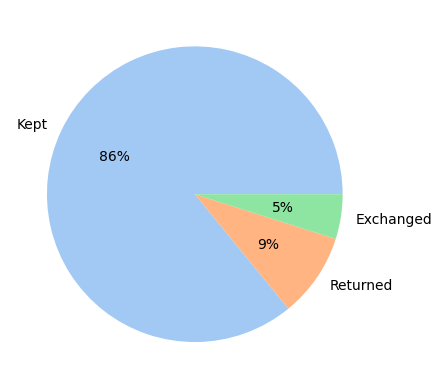

In [26]:
status = df['return_status'].value_counts()
plt.pie(
    status.values,
    labels=status.index,
    colors=sns.color_palette('pastel'),
    autopct='%.0f%%'
)
plt.show()

### Payment Method Analysis

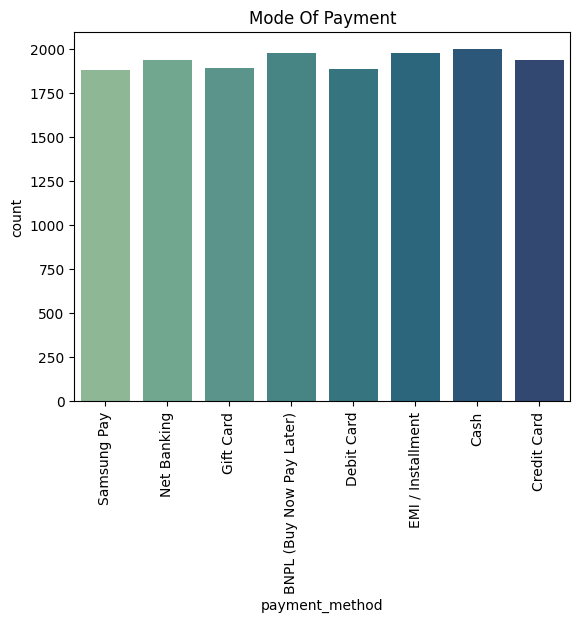

In [27]:
sns.countplot(x='payment_method', data=df, hue='payment_method', palette='crest')
plt.title("Mode Of Payment")
plt.xticks(rotation=90)
plt.show()

## Time Based Analysis 

### Year Wise Revenue Trend ###

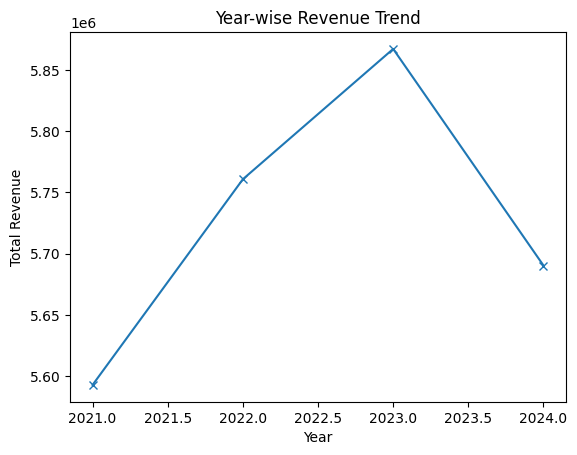

In [28]:
yearly_revenue = df.groupby('year')['revenue_usd'].sum()

plt.plot(yearly_revenue.index, yearly_revenue.values, marker='x')
plt.title("Year-wise Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.show()

### seasonal Revenue Trend ###

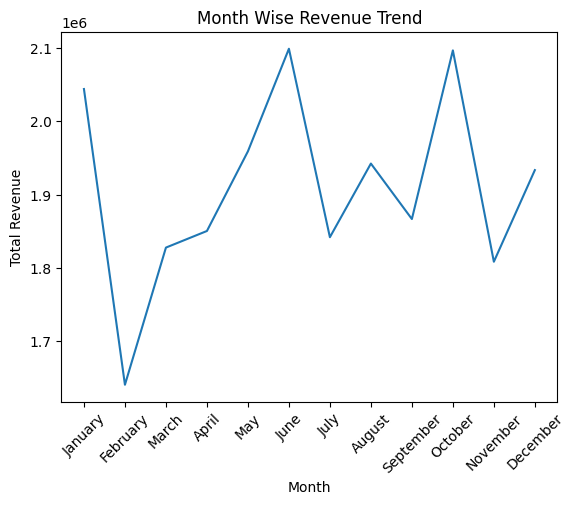

In [29]:
Months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']


monthly_revenue = df.groupby('month')['revenue_usd'].sum().reindex(Months_order)

sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title("Month Wise Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

### Quarterly Performance ###

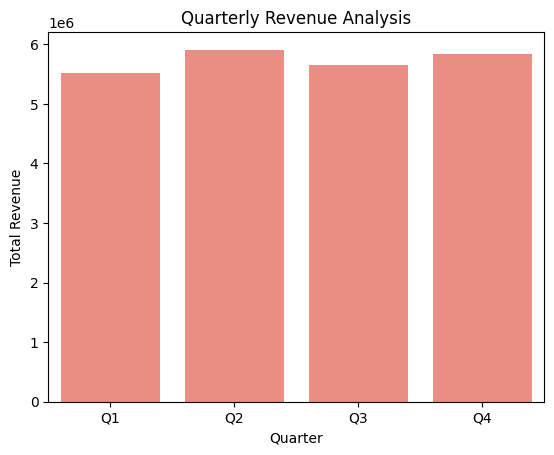

In [30]:
quarterly_revenue = df.groupby('quarter')['revenue_usd'].sum()

sns.barplot(x=quarterly_revenue.index, y=quarterly_revenue.values, color="salmon")
plt.title("Quarterly Revenue Analysis")
plt.xlabel("Quarter")
plt.ylabel("Total Revenue")
plt.show()

## Bivariate Analysis ##

### Revenue vs Units Sold ###

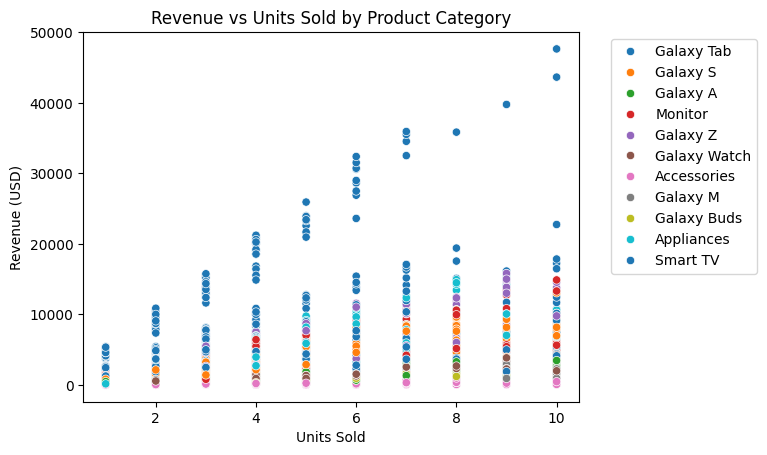

In [31]:
sns.scatterplot(
    x='units_sold',
    y='revenue_usd',
    hue='category',
    palette='tab10',
    data=df,
)
plt.title("Revenue vs Units Sold by Product Category")
plt.xlabel("Units Sold")
plt.ylabel("Revenue (USD)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Discount vs Revenue ###

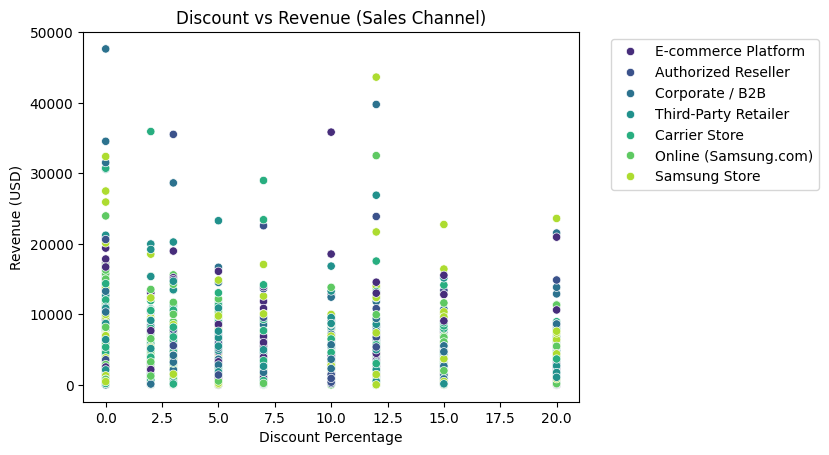

In [32]:
sns.scatterplot(
    x='discount_pct',
    y='revenue_usd',
    hue='sales_channel',
    palette='viridis',
    data=df,
)
plt.title("Discount vs Revenue (Sales Channel)")
plt.xlabel("Discount Percentage")
plt.ylabel("Revenue (USD)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Customer Segment vs Revenue ###

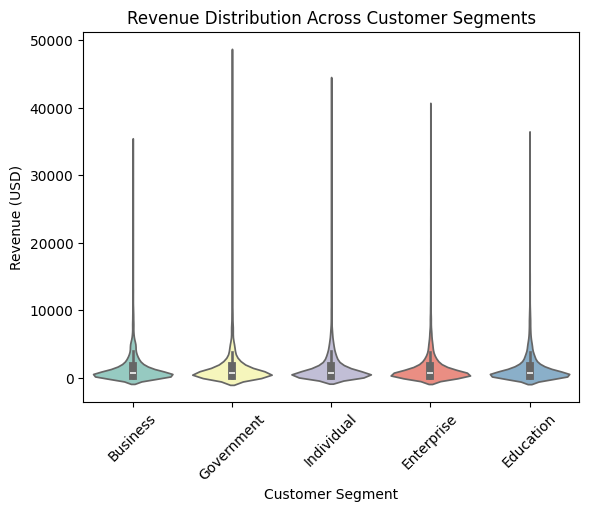

In [33]:
sns.violinplot(
    x='customer_segment',
    y='revenue_usd',
    hue = 'customer_segment',
    palette='Set3',
    data=df
)
plt.title("Revenue Distribution Across Customer Segments")
plt.xlabel("Customer Segment")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

### Units Sold vs Discount (Region Wise) ###

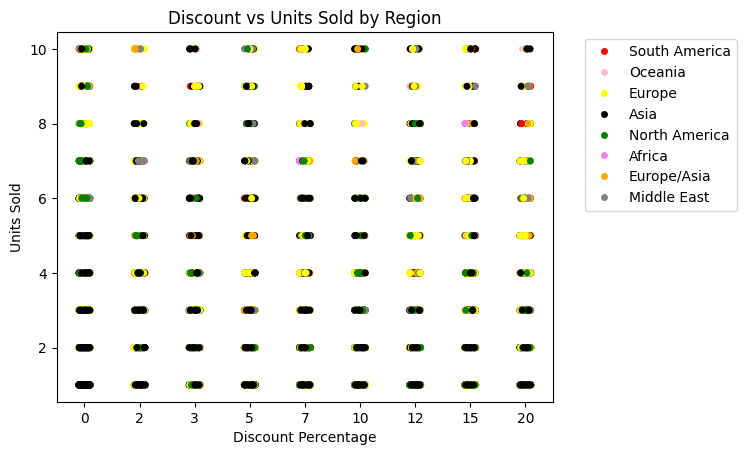

In [34]:
custom_colors = {
    'South America': 'red',
    'Oceania': 'pink',
    'Europe': 'yellow',
    'Asia': 'black',
    'North America': 'green',
    'Africa': 'violet',
    'Europe/Asia': 'orange',
    'Middle East': 'gray'
}
sns.stripplot(
    x='discount_pct',
    y='units_sold',
    hue='region',
    palette=custom_colors,
    data=df,
    jitter = True
)
plt.title("Discount vs Units Sold by Region")
plt.xlabel("Discount Percentage")
plt.ylabel("Units Sold")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Revenue vs Discount %(Region Wise)

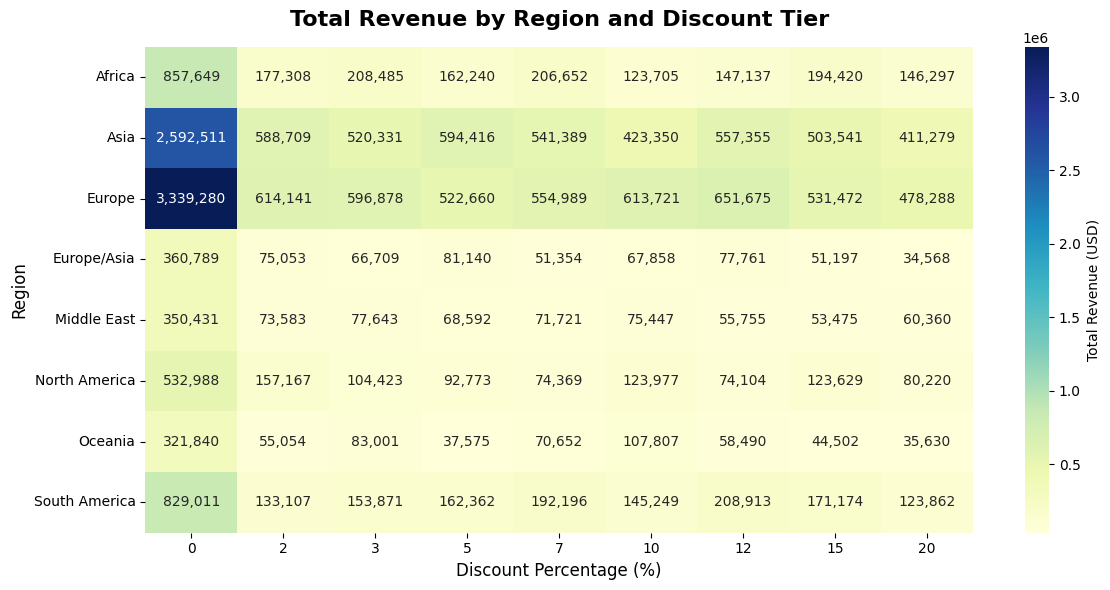

In [35]:
heatmap_data = df.pivot_table(
    index='region', 
    columns='discount_pct', 
    values='revenue_usd', 
    aggfunc='sum'
)

plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data, 
    cmap='YlGnBu',
    annot=True,
    fmt=',.0f', 
    cbar_kws={'label': 'Total Revenue (USD)'}
)

plt.title("Total Revenue by Region and Discount Tier", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Discount Percentage (%)", fontsize=12)
plt.ylabel("Region", fontsize=12)

plt.tight_layout()
plt.show()

## Product Analysis

### Top 10 Products by Revenue

C:\Users\subha\AppData\Local\Temp\ipykernel_14236\569206836.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


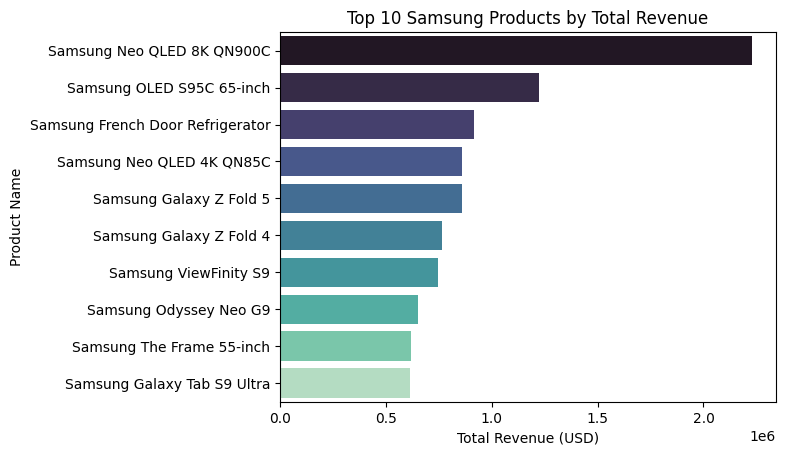

In [36]:
top_products = (
    df.groupby('product_name')['revenue_usd']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

sns.barplot(
    x=top_products.values,
    y=top_products.index,
    palette='mako'
)
plt.title("Top 10 Samsung Products by Total Revenue")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Product Name")
plt.show()

### Revenue by Product Category

C:\Users\subha\AppData\Local\Temp\ipykernel_14236\1030870593.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


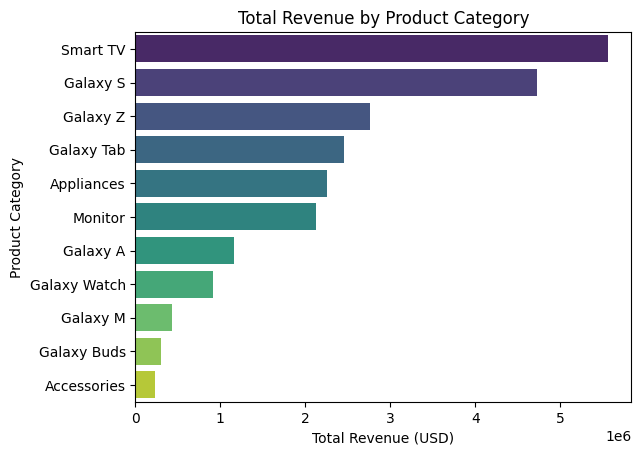

In [37]:
category_revenue = (
    df.groupby('category')['revenue_usd']
    .sum()
    .sort_values(ascending=False)
)

sns.barplot(
    x=category_revenue.values,
    y=category_revenue.index,
    palette='viridis'
)
plt.title("Total Revenue by Product Category")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Product Category")
plt.show()

### Units Sold per Category

C:\Users\subha\AppData\Local\Temp\ipykernel_14236\4043731577.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


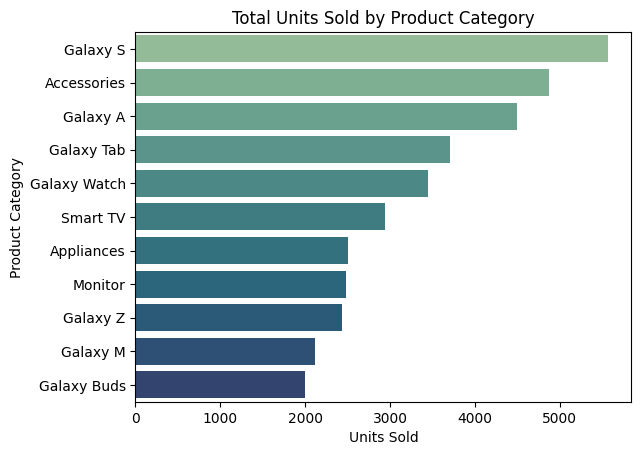

In [38]:
category_units = (
    df.groupby('category')['units_sold']
    .sum()
    .sort_values(ascending=False)
)

sns.barplot(
    x=category_units.values,
    y=category_units.index,
    palette='crest'
)
plt.title("Total Units Sold by Product Category")
plt.xlabel("Units Sold")
plt.ylabel("Product Category")
plt.show()

### Top Products by Units Sold

C:\Users\subha\AppData\Local\Temp\ipykernel_14236\3155488909.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


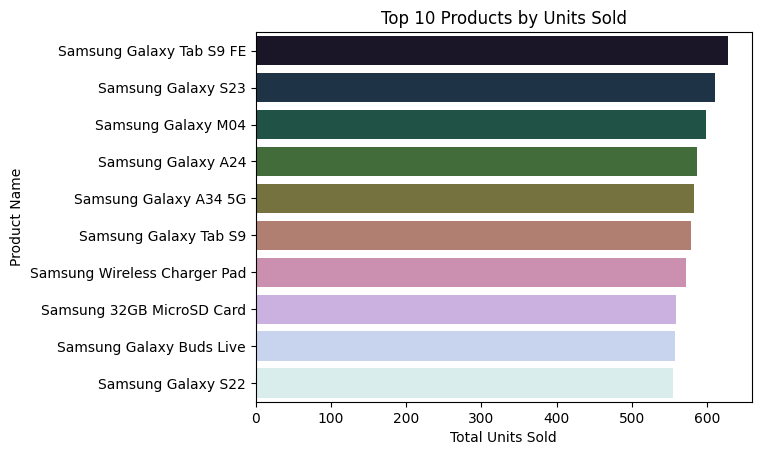

In [39]:
top_units = (
    df.groupby('product_name')['units_sold']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

sns.barplot(
    x=top_units.values,
    y=top_units.index,
    palette='cubehelix'
)
plt.title("Top 10 Products by Units Sold")
plt.xlabel("Total Units Sold")
plt.ylabel("Product Name")
plt.show()

## Customer Analysis

### Customer Segment vs Units Sold

C:\Users\subha\AppData\Local\Temp\ipykernel_14236\3031732456.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


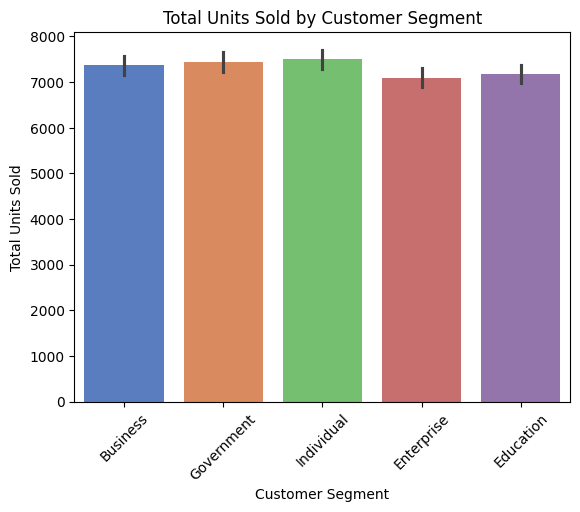

In [40]:
sns.barplot(
    data=df,
    x='customer_segment',
    y='units_sold',
    estimator=sum,
    palette='muted'
)
plt.title("Total Units Sold by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=45)
plt.show()

### Customer Rating

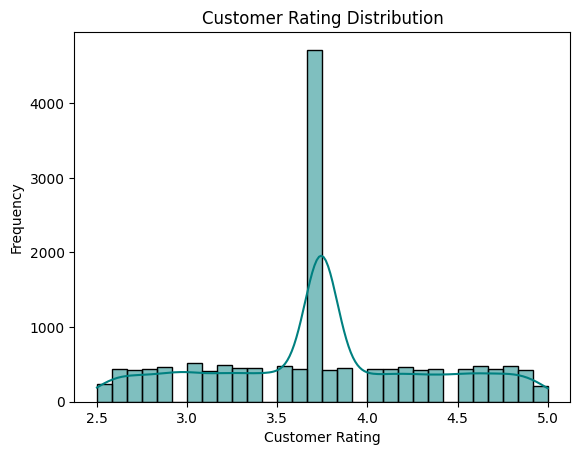

In [41]:
sns.histplot(
    df['customer_rating'],
    bins=30,
    kde=True,
    color='teal'
)
plt.title("Customer Rating Distribution")
plt.xlabel("Customer Rating")
plt.ylabel("Frequency")
plt.show()

## Correlation Heatmap

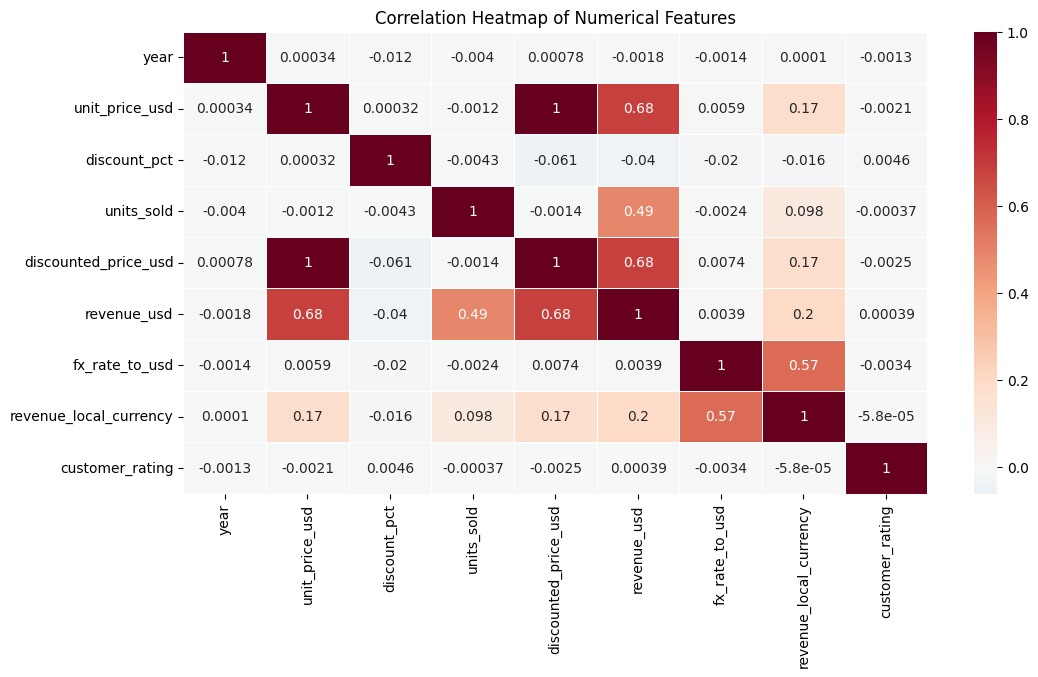

In [42]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='RdBu_r',
    center=0,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()